Problem Statement:

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing the sales of their products.

The dataset includes two files:

- bigdatamart_Train.csv: Use this file for the model building purpose. 

- bigdatamart_Test.csv: Use this file for getting predictions from the trained model. 

Note: You can find the dataset in the link below.



In [1]:
# import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# Using Train DataSets:

In [2]:
df=pd.read_csv("bigdatamart_Train.csv")
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


Load the dataset

In [3]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

above is the list of all columns

In [4]:
df.shape

(8523, 12)

we have 8523 rows and 12 columns in our dataset

In [5]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

Some columns are with datatype interger and some are with float, we have some with object type as well which we need to convert into numerical format

# Outcome of describe dataset:

In [6]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

item weight, outlet size has null values.Lets view it with visualization method

<AxesSubplot:>

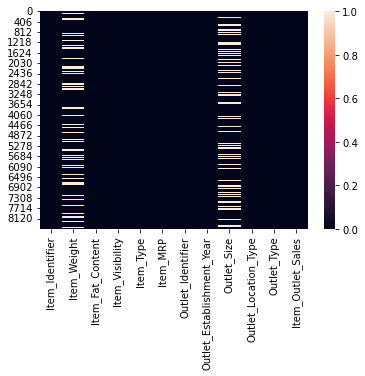

In [7]:
sns.heatmap(df.isnull())

We have missing values in two columns: Item_Weight, Outlet_size. Let's check the correlation before replacing the null values.

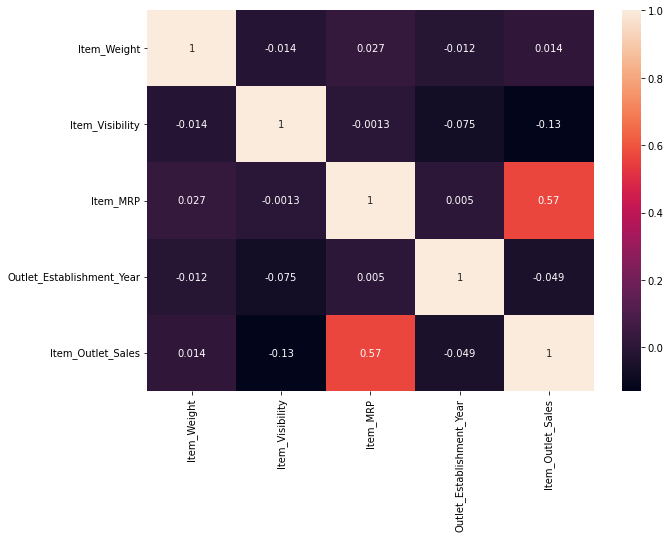

In [8]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True)
plt.show()

Item_MRP is positively correlated with Item_Outlet_Sales. All other columns has negative correlation with Item_Outlet_Sales. Also Item_Weight has very low correlation with Item_Outlet_Sales.

In [9]:
df.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

Item_Visibility, Item_MRP and Item_Outlet_Sales are numerical type hence number of unique values are high in these columns, all other columns are object type or categorical. let's divide all columns accordingly for further analysis and processing.

In [10]:
nom_col=[]
for i in df:
    if df.dtypes[i] == object:
        nom_col.append(i)
        
print(nom_col)

['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']


In [11]:
#we will remove some columns from the list which are not required
nom_col.remove('Item_Identifier')
nom_col.remove('Outlet_Identifier')
nom_col

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [12]:
#lets print unique values of each column with respective count of that value.
for i in nom_col:
    print(i,"values:")
    print(df[i].value_counts(),"\n")

Item_Fat_Content values:
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64 

Item_Type values:
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64 

Outlet_Size values:
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64 

Outlet_Location_Type values:
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64 

Outlet_Type values:
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket 

In column Item_Fat_Content, we have two types of values however its labeled in different types. Hence we need to make necessary corrections. All other others have unique values with good number of counts.

In [13]:
df['Item_Fat_Content']=df['Item_Fat_Content'].replace("LF","Low Fat")
df['Item_Fat_Content']=df['Item_Fat_Content'].replace("low fat","Low Fat")

We have replaced all low fat value with only one label 'Low Fat'.



In [14]:
df['Item_Fat_Content']=df['Item_Fat_Content'].replace("reg","Regular")

We have replaced all regular fat value with only one label 'Regular'.



In [15]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [16]:
df['Item_Identifier']=df['Item_Identifier'].str[:2]

In [17]:
df['Item_Identifier'].value_counts()

FD    6125
NC    1599
DR     799
Name: Item_Identifier, dtype: int64

In [18]:
df['Item_Identifier']=df['Item_Identifier'].replace("FD","Food")
df['Item_Identifier']=df['Item_Identifier'].replace("DR","Drinks")
df['Item_Identifier']=df['Item_Identifier'].replace("NC","Non-Consumable")

In [19]:
df['Item_Identifier'].value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: Item_Identifier, dtype: int64

We have replace values of Item_Identifier column into some readable values.

In [20]:
df['Item_Weight']=df['Item_Weight'].replace(np.nan,df['Item_Weight'].mean())

we have replaced null values of Item_Weight column with mean.

# Let's see Visualization:

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

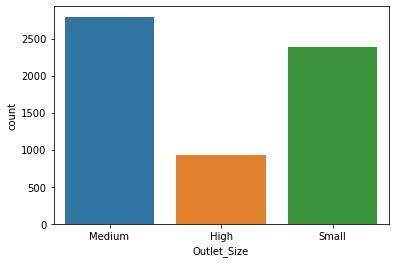

In [21]:
sns.countplot(df['Outlet_Size'])

Maximum number of items belongs to Medium Outlet_Size, hence 'Medium' is mode.

In [22]:
df['Outlet_Size']=df['Outlet_Size'].replace(np.nan,"Medium")

In [23]:
df['Outlet_Size'].count().sum()

8523

<AxesSubplot:>

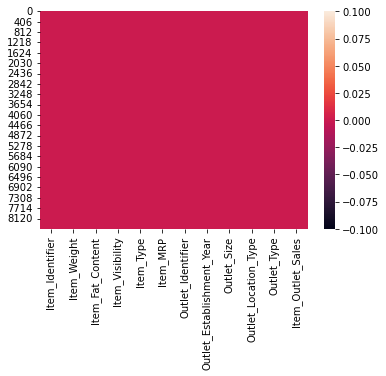

In [24]:
sns.heatmap(df.isnull())

noe we have all null values has been succesfully remove

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64


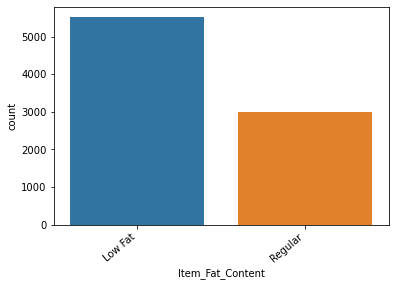

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


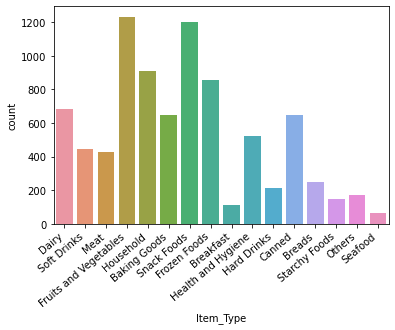

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64


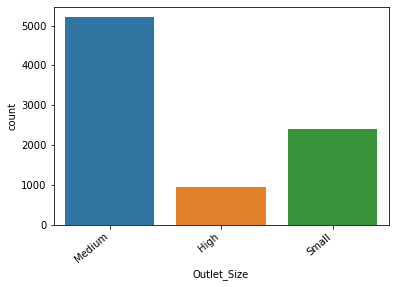

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64


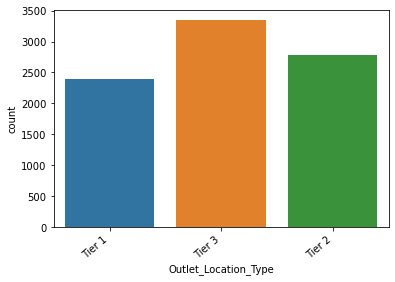

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64


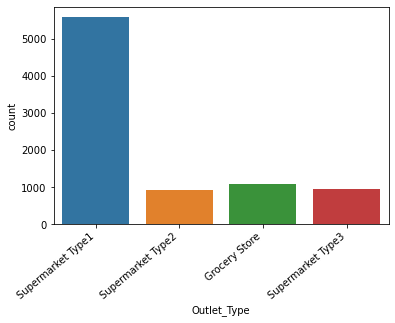

In [25]:
for i in nom_col:
    plt.figure()
    a=sns.countplot(df[i])
    print(df[i].value_counts())
    a.set_xticklabels(a.get_xticklabels(), rotation=40, ha="right")
    plt.show()

Above plot show count of all in the speciafic column.

<AxesSubplot:xlabel='Item_Identifier', ylabel='count'>

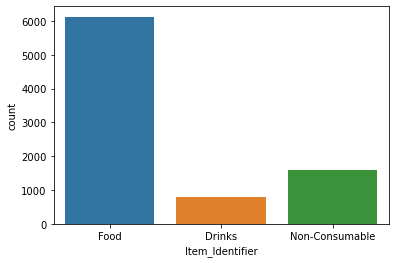

In [26]:
sns.countplot(df['Item_Identifier'])

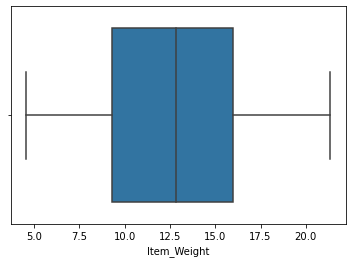

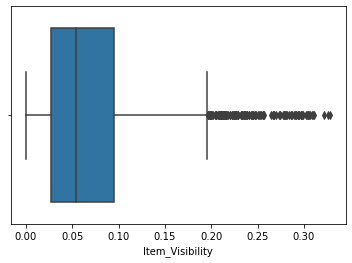

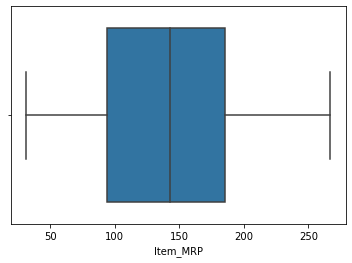

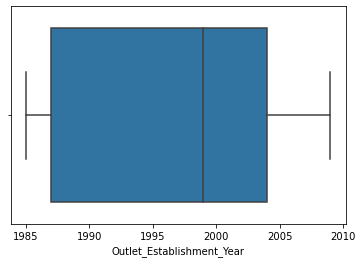

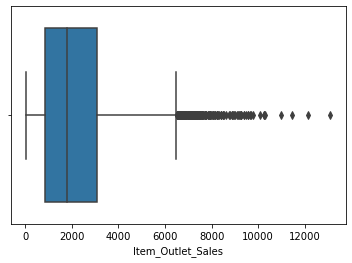

In [27]:
for i in df.columns:
    if df[i].dtypes!='object':
        plt.figure()
        sns.boxplot(x=df[i])

We can see outliers in Item_visibility column.

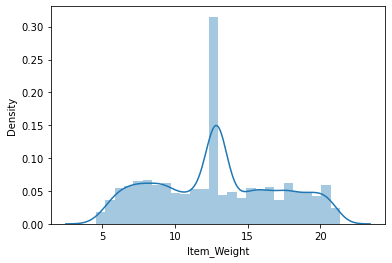

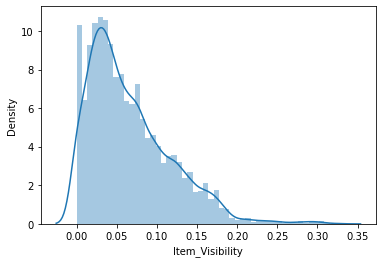

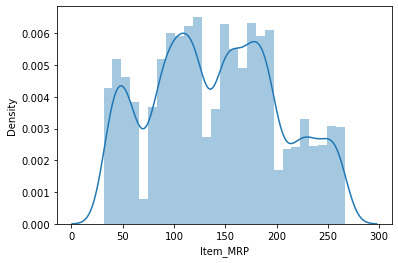

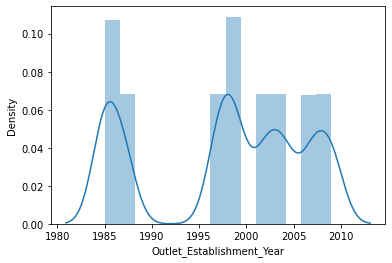

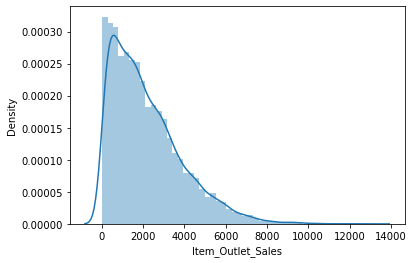

In [28]:
for i in df.columns:
    if df[i].dtypes!='object':
        plt.figure()
        sns.distplot(df[i],kde=True)

some skewness has preset here.

In [29]:
cor_matrix=df.corr()
cor_matrix['Item_Outlet_Sales'].sort_values(ascending=False)

Item_Outlet_Sales            1.000000
Item_MRP                     0.567574
Item_Weight                  0.011550
Outlet_Establishment_Year   -0.049135
Item_Visibility             -0.128625
Name: Item_Outlet_Sales, dtype: float64

# Encoding:

Before removing outliers from dataset, we need to encode the data else system will some errors.

In [30]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()

for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=oe.fit_transform(df[i].values.reshape(-1,1))

In [31]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,1.0,9.300,0.0,0.016047,4.0,249.8092,9.0,1999,1.0,0.0,1.0,3735.1380
1,0.0,5.920,1.0,0.019278,14.0,48.2692,3.0,2009,1.0,2.0,2.0,443.4228
2,1.0,17.500,0.0,0.016760,10.0,141.6180,9.0,1999,1.0,0.0,1.0,2097.2700
3,1.0,19.200,1.0,0.000000,6.0,182.0950,0.0,1998,1.0,2.0,0.0,732.3800
4,2.0,8.930,0.0,0.000000,9.0,53.8614,1.0,1987,0.0,2.0,1.0,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,1.0,6.865,0.0,0.056783,13.0,214.5218,1.0,1987,0.0,2.0,1.0,2778.3834
8519,1.0,8.380,1.0,0.046982,0.0,108.1570,7.0,2002,1.0,1.0,1.0,549.2850
8520,2.0,10.600,0.0,0.035186,8.0,85.1224,6.0,2004,2.0,1.0,1.0,1193.1136
8521,1.0,7.210,1.0,0.145221,13.0,103.1332,3.0,2009,1.0,2.0,2.0,1845.5976


In [32]:
df.describe()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,1.093864,12.857645,0.352693,0.066132,7.226681,140.992782,4.722281,1997.831867,1.170832,1.112871,1.201220,2181.288914
std,0.522090,4.226124,0.477836,0.051598,4.209990,62.275067,2.837201,8.371760,0.600327,0.812757,0.796459,1706.499616
min,0.000000,4.555000,0.000000,0.000000,0.000000,31.290000,0.000000,1985.000000,0.000000,0.000000,0.000000,33.290000
25%,1.000000,9.310000,0.000000,0.026989,4.000000,93.826500,2.000000,1987.000000,1.000000,0.000000,1.000000,834.247400
50%,1.000000,12.857645,0.000000,0.053931,6.000000,143.012800,5.000000,1999.000000,1.000000,1.000000,1.000000,1794.331000
75%,1.000000,16.000000,1.000000,0.094585,10.000000,185.643700,7.000000,2004.000000,2.000000,2.000000,1.000000,3101.296400
max,2.000000,21.350000,1.000000,0.328391,15.000000,266.888400,9.000000,2009.000000,2.000000,2.000000,3.000000,13086.964800


<AxesSubplot:>

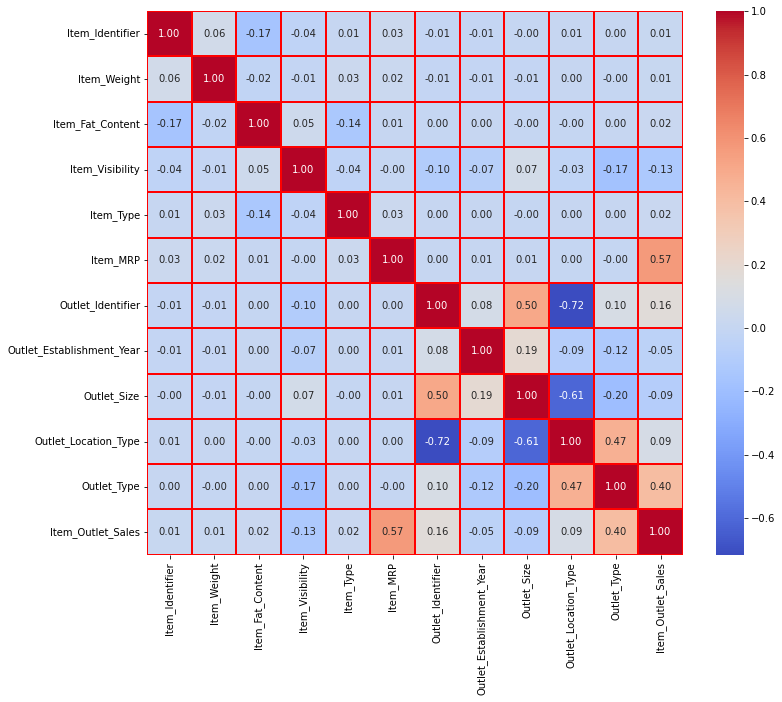

In [33]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor="red",fmt="0.2f",cmap="coolwarm")

We are checking correlation of columns after encoding.

In [34]:
cor_matrix=df.corr()
cor_matrix['Item_Outlet_Sales'].sort_values(ascending=False)

Item_Outlet_Sales            1.000000
Item_MRP                     0.567574
Outlet_Type                  0.401522
Outlet_Identifier            0.162325
Outlet_Location_Type         0.089367
Item_Fat_Content             0.018719
Item_Type                    0.017048
Item_Weight                  0.011550
Item_Identifier              0.011236
Outlet_Establishment_Year   -0.049135
Outlet_Size                 -0.086182
Item_Visibility             -0.128625
Name: Item_Outlet_Sales, dtype: float64

# Outliers and skewness removal:

In [35]:
df.skew()

Item_Identifier              0.114510
Item_Weight                  0.090561
Item_Fat_Content             0.616705
Item_Visibility              1.167091
Item_Type                    0.101655
Item_MRP                     0.127202
Outlet_Identifier           -0.059861
Outlet_Establishment_Year   -0.396641
Outlet_Size                 -0.087072
Outlet_Location_Type        -0.209093
Outlet_Type                  0.927438
Item_Outlet_Sales            1.177531
dtype: float64

In [36]:
#Removing outliers
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([  49,   83,  108,  130,  145,  174,  276,  304,  333,  373,  434,
         456,  472,  502,  521,  532,  661,  694,  753,  809,  854,  935,
         991,  997, 1009, 1138, 1159, 1254, 1272, 1291, 1311, 1324, 1434,
        1450, 1496, 1501, 1506, 1560, 1575, 1644, 1651, 1805, 1827, 1841,
        1859, 1998, 2088, 2109, 2122, 2216, 2238, 2251, 2293, 2324, 2439,
        2445, 2516, 2535, 2586, 2613, 2728, 2776, 2855, 2895, 3017, 3083,
        3087, 3098, 3154, 3206, 3234, 3286, 3399, 3407, 3458, 3474, 3488,
        3497, 3540, 3667, 3709, 3720, 3750, 3757, 3767, 3884, 3993, 4006,
        4219, 4289, 4346, 4349, 4382, 4408, 4530, 4656, 4674, 4676, 4681,
        4772, 4789, 4888, 4941, 4961, 4991, 5031, 5065, 5150, 5177, 5185,
        5223, 5287, 5315, 5374, 5500, 5550, 5619, 5732, 5734, 5752, 5795,
        5799, 5812, 5837, 5880, 5891, 5946, 5977, 6000, 6008, 6012, 6134,
        6179, 6334, 6409, 6536, 6537, 6541, 6576, 6606, 6622, 6674, 6786,
        6886, 6903, 6993, 7005, 7016, 

In [37]:
df_new=df[(z<3).all(axis=1)]
df_new

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,1.0,9.300,0.0,0.016047,4.0,249.8092,9.0,1999,1.0,0.0,1.0,3735.1380
1,0.0,5.920,1.0,0.019278,14.0,48.2692,3.0,2009,1.0,2.0,2.0,443.4228
2,1.0,17.500,0.0,0.016760,10.0,141.6180,9.0,1999,1.0,0.0,1.0,2097.2700
3,1.0,19.200,1.0,0.000000,6.0,182.0950,0.0,1998,1.0,2.0,0.0,732.3800
4,2.0,8.930,0.0,0.000000,9.0,53.8614,1.0,1987,0.0,2.0,1.0,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,1.0,6.865,0.0,0.056783,13.0,214.5218,1.0,1987,0.0,2.0,1.0,2778.3834
8519,1.0,8.380,1.0,0.046982,0.0,108.1570,7.0,2002,1.0,1.0,1.0,549.2850
8520,2.0,10.600,0.0,0.035186,8.0,85.1224,6.0,2004,2.0,1.0,1.0,1193.1136
8521,1.0,7.210,1.0,0.145221,13.0,103.1332,3.0,2009,1.0,2.0,2.0,1845.5976


now remove all outliers

In [38]:
df.shape

(8523, 12)

In [39]:
df_new.shape

(8338, 12)

In [40]:
#Percentage data loss:
loss_percent=(8523-8338)/8523*100
print(loss_percent)

2.170597207556025


In [41]:
x=df_new.drop('Item_Outlet_Sales', axis=1)
y=df_new['Item_Outlet_Sales']
print(x.shape)
print(y.shape)

(8338, 11)
(8338,)


In [42]:
from sklearn.preprocessing import power_transform
df_new=power_transform(x)

df_new=pd.DataFrame(df_new,columns=x.columns)

In [43]:
df_new.skew()

Item_Identifier              0.048167
Item_Weight                 -0.069766
Item_Fat_Content             0.620973
Item_Visibility              0.115911
Item_Type                   -0.165742
Item_MRP                    -0.112576
Outlet_Identifier           -0.214995
Outlet_Establishment_Year   -0.224452
Outlet_Size                 -0.043996
Outlet_Location_Type        -0.216731
Outlet_Type                  0.010691
dtype: float64

We can see, now skewness has been reduced.

# Let's perform standardization:

In [44]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit_transform(df_new)

array([[-0.1744269 , -0.81707423, -0.73664489, ..., -0.28760444,
        -1.37581641, -0.13467763],
       [-2.12263032, -1.72477171,  1.35750619, ..., -0.28760444,
         1.09508924,  1.05688633],
       [-0.1744269 ,  1.07938519, -0.73664489, ..., -0.28760444,
        -1.37581641, -0.13467763],
       ...,
       [ 1.71153183, -0.49268289, -0.73664489, ...,  1.3926764 ,
        -0.12639076, -0.13467763],
       [-0.1744269 , -1.36554488,  1.35750619, ..., -0.28760444,
         1.09508924,  1.05688633],
       [-2.12263032,  0.48935138, -0.73664489, ...,  1.3926764 ,
        -1.37581641, -0.13467763]])

In [45]:
x=df_new

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [49]:
maxAcc=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    Ln=LinearRegression()
    Ln.fit(x_train,y_train)
    pred=Ln.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print("Best accuracy is ",maxAcc, " at Random State ",maxRS)

Best accuracy is  0.5508754680219935  at Random State  82


In [50]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=maxRS)

In [51]:
model=[LinearRegression(),DecisionTreeRegressor(),RandomForestRegressor(),AdaBoostRegressor()]
for m in model:
    m.fit(x_train,y_train)
    #sc=m.score(x_train,y_train)
    predm=m.predict(x_test)
    acc=r2_score(y_test,predm)
    print('Accuracy Score of',m,'is:',acc)
    print('mean_absolute_error:',mean_absolute_error(y_test,predm))
    print('mean_squared_error:',mean_squared_error(y_test,predm))
    print('Root mean_squared_error:',np.sqrt(mean_squared_error(y_test,predm)))
    print("\n")

Accuracy Score of LinearRegression() is: 0.5508754680219935
mean_absolute_error: 844.4758216776615
mean_squared_error: 1228215.1019190475
Root mean_squared_error: 1108.2486642983367


Accuracy Score of DecisionTreeRegressor() is: 0.2708012981077179
mean_absolute_error: 1009.2514131894484
mean_squared_error: 1994130.345139384
Root mean_squared_error: 1412.1368011419374


Accuracy Score of RandomForestRegressor() is: 0.5905128927850201
mean_absolute_error: 755.4829207134293
mean_squared_error: 1119819.1443864645
Root mean_squared_error: 1058.2150747303049


Accuracy Score of AdaBoostRegressor() is: 0.6077123287444028
mean_absolute_error: 781.8033015276
mean_squared_error: 1072784.0672848693
Root mean_squared_error: 1035.7528987576472




# Cross Validation of model:

In [52]:
model=[LinearRegression(),DecisionTreeRegressor(),RandomForestRegressor(),AdaBoostRegressor()]
for m in model:
    score=cross_val_score(m,x,y,cv=5)
    print("Score for",m,"is: ",score.mean())

Score for LinearRegression() is:  0.5149819063278622
Score for DecisionTreeRegressor() is:  0.15816828039376615
Score for RandomForestRegressor() is:  0.5389835484202757
Score for AdaBoostRegressor() is:  0.5454703814438581


With LinearRegression model there is very less difference in accuracy and cross validation score, Hence the best model is AdaBoostRegressor.

# Hyperparameter Tuning:

In [58]:
from sklearn.model_selection import GridSearchCV

In [62]:
parameters={'fit_intercept':[True,False], 
           'normalize':[True,False], 
           'copy_X':[True, False],
          'positive':[True, False]}

In [63]:
GCV=GridSearchCV(LinearRegression(),parameters,cv=5)

In [64]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False],
                         'positive': [True, False]})

In [65]:
GCV.best_params_

{'copy_X': True, 'fit_intercept': True, 'normalize': True, 'positive': False}

In [67]:
Final_mod= LinearRegression(copy_X='True',fit_intercept='True',positive="False")
Final_mod.fit(x_train,y_train)
pred=Final_mod.predict(x_test)
r2=r2_score(y_test,pred)
print(r2*100)

54.20282108930912


After performing GridSearchCV method accuarcy is 54.20%

# saving the best model:

In [68]:
import pickle
filename= 'BigMart_new.pkl'
pickle.dump(Final_mod, open(filename, 'wb'))

# Using Test DataSet:

In [69]:
test=pd.read_csv("bigdatamart_Test.csv")
test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [70]:
test.shape

(5681, 11)

data set has 5681 rowrs 11 columns

In [71]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

item_weight and outlet_size are missing values. we need to handel it

In [72]:
test['Item_Weight']=test['Item_Weight'].replace(np.nan,test['Item_Weight'].mean())

item weight has been successfully replace null values

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

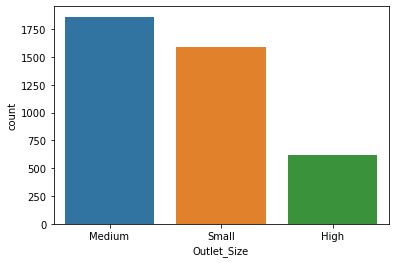

In [74]:
sns.countplot(test['Outlet_Size'])

In [75]:
test['Outlet_Size']=test['Outlet_Size'].replace(np.nan,"Medium")

In [76]:
test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

not null values present here

In [77]:
nom_col=[]
for i in test:
    if test.dtypes[i] == object:
        nom_col.append(i)
        
print(nom_col)

['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']


In [78]:
#we will remove some columns from the list which are not required
nom_col.remove('Item_Identifier')
nom_col.remove('Outlet_Identifier')
nom_col

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [79]:
#lets print unique values of each column with respective count of that value.
for i in nom_col:
    print(i,"values:")
    print(test[i].value_counts(),"\n")

Item_Fat_Content values:
Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64 

Item_Type values:
Snack Foods              789
Fruits and Vegetables    781
Household                638
Frozen Foods             570
Dairy                    454
Baking Goods             438
Canned                   435
Health and Hygiene       338
Meat                     311
Soft Drinks              281
Breads                   165
Hard Drinks              148
Starchy Foods            121
Others                   111
Breakfast                 76
Seafood                   25
Name: Item_Type, dtype: int64 

Outlet_Size values:
Medium    3468
Small     1592
High       621
Name: Outlet_Size, dtype: int64 

Outlet_Location_Type values:
Tier 3    2233
Tier 2    1856
Tier 1    1592
Name: Outlet_Location_Type, dtype: int64 

Outlet_Type values:
Supermarket Type1    3717
Grocery Store         722
Supermarket Type3     624
Supermarket Type2     618
Na

In [80]:
test['Item_Fat_Content']=test['Item_Fat_Content'].replace("LF","Low Fat")
test['Item_Fat_Content']=test['Item_Fat_Content'].replace("low fat","Low Fat")
test['Item_Fat_Content']=test['Item_Fat_Content'].replace("reg","Regular")

In [81]:
test['Item_Identifier']=test['Item_Identifier'].str[:2]

In [82]:
test['Item_Identifier']=test['Item_Identifier'].replace("FD","Food")
test['Item_Identifier']=test['Item_Identifier'].replace("DR","Drinks")
test['Item_Identifier']=test['Item_Identifier'].replace("NC","Non-Consumable")

In [83]:
test['Item_Identifier'].value_counts()

Food              4076
Non-Consumable    1087
Drinks             518
Name: Item_Identifier, dtype: int64

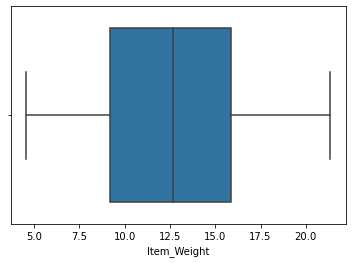

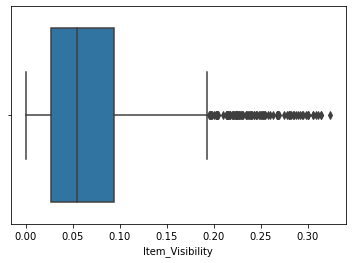

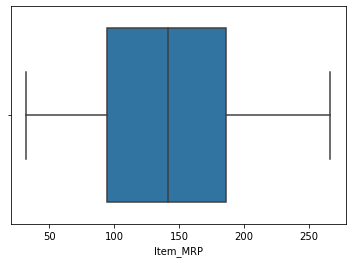

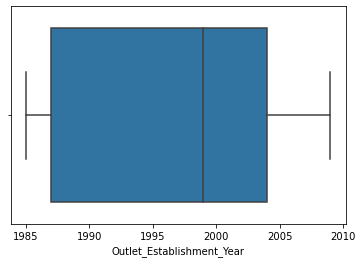

In [84]:
for i in test.columns:
    if test[i].dtypes!='object':
        plt.figure()
        sns.boxplot(x=test[i])

# Lets do encoding:

In [85]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()

for i in test.columns:
    if test[i].dtypes=='object':
        test[i]=oe.fit_transform(test[i].values.reshape(-1,1))

In [86]:
test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1.0,20.750000,0.0,0.007565,13.0,107.8622,9.0,1999,1.0,0.0,1.0
1,1.0,8.300000,1.0,0.038428,4.0,87.3198,2.0,2007,1.0,1.0,1.0
2,2.0,14.600000,0.0,0.099575,11.0,241.7538,0.0,1998,1.0,2.0,0.0
3,1.0,7.315000,0.0,0.015388,13.0,155.0340,2.0,2007,1.0,1.0,1.0
4,1.0,12.695633,1.0,0.118599,4.0,234.2300,5.0,1985,1.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
5676,1.0,10.500000,1.0,0.013496,13.0,141.3154,8.0,1997,2.0,0.0,1.0
5677,1.0,7.600000,1.0,0.142991,15.0,169.1448,3.0,2009,1.0,2.0,2.0
5678,2.0,10.000000,0.0,0.073529,8.0,118.7440,7.0,2002,1.0,1.0,1.0
5679,1.0,15.300000,1.0,0.000000,3.0,214.6218,2.0,2007,1.0,1.0,1.0


after performing ordinal encoding , categorical data transfer to numeric values

In [87]:
test.skew()

Item_Identifier              0.121499
Item_Weight                  0.142813
Item_Fat_Content             0.609223
Item_Visibility              1.238312
Item_Type                    0.096486
Item_MRP                     0.136182
Outlet_Identifier           -0.060209
Outlet_Establishment_Year   -0.396306
Outlet_Size                 -0.087108
Outlet_Location_Type        -0.209049
Outlet_Type                  0.927446
dtype: float64

# Removing outliers & skewness:

In [88]:
from scipy.stats import zscore
z=np.abs(zscore(test))
threshold=3
np.where(z>3)

(array([  46,   76,   78,   89,  138,  333,  385,  474,  543,  637,  858,
         871, 1046, 1191, 1256, 1270, 1411, 1516, 1547, 1577, 1616, 1710,
        1812, 1823, 1857, 1915, 1919, 2019, 2179, 2230, 2365, 2380, 2393,
        2504, 2516, 2561, 2605, 2609, 2625, 2628, 2677, 2779, 2836, 2843,
        3267, 3294, 3313, 3316, 3346, 3378, 3502, 3638, 3679, 3970, 4052,
        4147, 4159, 4208, 4255, 4328, 4365, 4421, 4575, 4616, 4689, 4801,
        4804, 4846, 4919, 4976, 4999, 5121, 5157, 5277, 5290, 5435, 5469,
        5482, 5514, 5571, 5668], dtype=int64),
 array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int64))

In [90]:
test_new=test[(z<3).all(axis=1)]
test_new

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1.0,20.750000,0.0,0.007565,13.0,107.8622,9.0,1999,1.0,0.0,1.0
1,1.0,8.300000,1.0,0.038428,4.0,87.3198,2.0,2007,1.0,1.0,1.0
2,2.0,14.600000,0.0,0.099575,11.0,241.7538,0.0,1998,1.0,2.0,0.0
3,1.0,7.315000,0.0,0.015388,13.0,155.0340,2.0,2007,1.0,1.0,1.0
4,1.0,12.695633,1.0,0.118599,4.0,234.2300,5.0,1985,1.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
5676,1.0,10.500000,1.0,0.013496,13.0,141.3154,8.0,1997,2.0,0.0,1.0
5677,1.0,7.600000,1.0,0.142991,15.0,169.1448,3.0,2009,1.0,2.0,2.0
5678,2.0,10.000000,0.0,0.073529,8.0,118.7440,7.0,2002,1.0,1.0,1.0
5679,1.0,15.300000,1.0,0.000000,3.0,214.6218,2.0,2007,1.0,1.0,1.0


now remove all outliers

In [91]:
test.shape

(5681, 11)

In [92]:
test_new.shape

(5600, 11)

In [93]:
#Percentage data loss:
loss_percent=(5681-5600)/5681*100
print(loss_percent)

1.425805315965499


In [94]:
x=test_new

In [95]:
from sklearn.preprocessing import power_transform
test_new=power_transform(x)

test_new=pd.DataFrame(test_new,columns=x.columns)

In [96]:
test_new.skew()

Item_Identifier              0.048696
Item_Weight                 -0.061909
Item_Fat_Content             0.616007
Item_Visibility              0.105676
Item_Type                   -0.169452
Item_MRP                    -0.111505
Outlet_Identifier           -0.214813
Outlet_Establishment_Year   -0.215341
Outlet_Size                 -0.041735
Outlet_Location_Type        -0.220882
Outlet_Type                  0.009585
dtype: float64

now skewness allmost remove

In [97]:
test_new=x

# Lets perform standardization:

In [98]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit_transform(test_new)

array([[-0.19260588,  1.88884016, -0.73841307, ..., -0.2761756 ,
        -1.37786207, -0.27721336],
       [-0.19260588, -1.03277868,  1.35425555, ..., -0.2761756 ,
        -0.14250703, -0.27721336],
       [ 1.7197929 ,  0.44563085, -0.73841307, ..., -0.2761756 ,
         1.09284802, -1.54447443],
       ...,
       [ 1.7197929 , -0.63384277, -0.73841307, ..., -0.2761756 ,
        -0.14250703, -0.27721336],
       [-0.19260588,  0.60989858,  1.35425555, ..., -0.2761756 ,
        -0.14250703, -0.27721336],
       [-0.19260588, -0.75117686,  1.35425555, ..., -0.2761756 ,
        -0.14250703, -0.27721336]])

# load the model:

In [99]:
import pickle
filename= 'bigdata_test_new.pkl'
pickle.dump(Final_mod, open(filename, 'wb'))

In [102]:
#end